# Forex Data Analysis

In [ ]:
%pip install requests
%pip install pandas
%pip install matplotlib

In [152]:
import matplotlib.pyplot as plt
import pandas as pd
import requests
import os

In [153]:
def generate_csv_file(symbol, interval):
    url = 'https://api.kraken.com/0/public/OHLC?pair='+ symbol +'&interval=' + interval
    resp = requests.get(url)
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result'][list(data['result'])[0]], columns=[
        'time','open','high','low','close','vwap','volume','count'
        ])
    data_directory = 'data'
    if not os.path.exists(data_directory):
        os.makedirs(data_directory)
    df.to_csv(os.path.join(data_directory, f'{symbol}_{interval}_data.csv'))


In [154]:
def get_data(symbol, interval):
    filename = f'data/{symbol}_{interval}_data.csv'
    data = pd.read_csv(filename, index_col=False)
    data['time'] = pd.to_datetime(data['time'], unit='s')
    data.set_index('time', inplace=True)
    data.drop(columns=['Unnamed: 0'], inplace=True)
    return data

In [155]:
generate_csv_file('EURUSD', '5')
generate_csv_file('EURGBP', '5')
generate_csv_file('GBPUSD', '5')
generate_csv_file('EURUSD', '30')
generate_csv_file('EURGBP', '30')
generate_csv_file('GBPUSD', '30')
generate_csv_file('EURUSD', '60')
generate_csv_file('EURGBP', '60')
generate_csv_file('GBPUSD', '60')

In [156]:
EURGBP_60 = get_data('EURGBP', '60')
GBPUSD_60 = get_data('GBPUSD', '60')
EURUSD_60 = get_data('EURUSD', '60')

In [157]:
EURUSD_60.head()

,open,high,low,close,vwap,volume,count
time,,,,,,,
2023-10-26 22:00:00,1.05620,1.05652,1.05618,1.05650,1.05640,59834.974688,343
2023-10-26 23:00:00,1.05650,1.05668,1.05630,1.05644,1.05643,199857.317922,513
2023-10-27 00:00:00,1.05639,1.05650,1.05578,1.05584,1.05605,26430.137894,216
2023-10-27 01:00:00,1.05581,1.05639,1.05537,1.05587,1.05577,69171.633193,430
2023-10-27 02:00:00,1.05590,1.05669,1.05587,1.05656,1.05608,80186.474841,284


In [158]:
EURUSD_60.describe()

,open,high,low,close,vwap,volume,count
count,720.000000,720.000000,720.000000,720.000000,720.000000,7.200000e+02,720.000000
mean,1.074246,1.074814,1.073714,1.074308,1.074262,3.554204e+05,773.827778
std,0.013066,0.013072,0.013052,0.013070,0.013060,5.136766e+05,657.038351
min,1.053210,1.053470,1.051810,1.053150,1.053100,3.759056e+03,19.000000
25%,1.065370,1.066280,1.064410,1.065800,1.065573,1.055641e+05,395.000000
50%,1.071045,1.071800,1.070490,1.071140,1.070895,1.964513e+05,612.000000
75%,1.089147,1.089713,1.088505,1.089228,1.089317,3.822826e+05,1001.250000
max,1.095910,1.096190,1.095590,1.096140,1.095750,5.532603e+06,10394.000000


<Axes: title={'center': 'Close prices over time'}, xlabel='TIME', ylabel='CLOSE'>

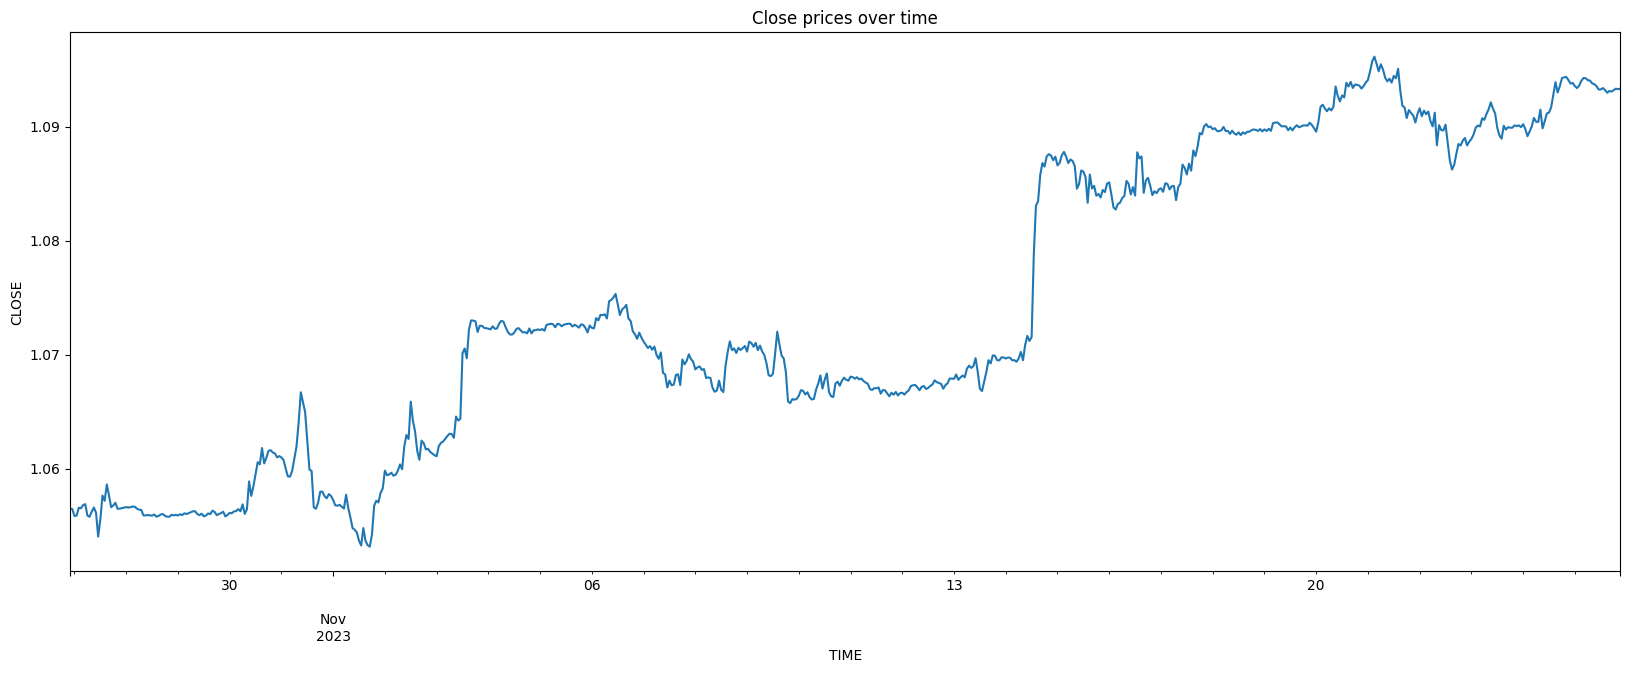

In [172]:
EURUSD_60['close'].plot(figsize=(20, 7), 
    x = 'close',
    y = 'time',
    title = 'Close prices over time',
    xlabel = 'TIME',
    ylabel = 'CLOSE')

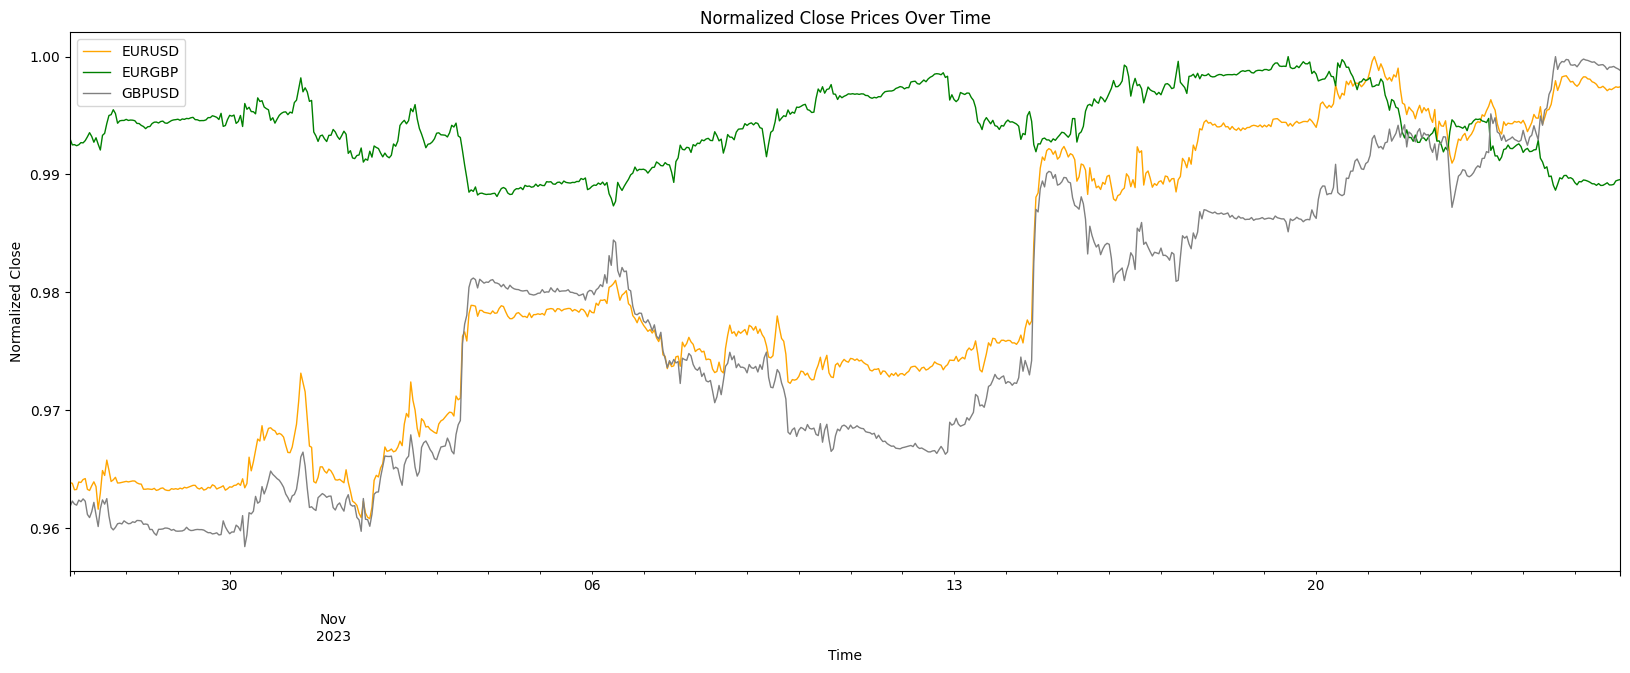

In [181]:
fig, ax = plt.subplots(figsize=(20, 7))

EURUSD_60['close_normalized'] = EURUSD_60['close'] / EURUSD_60['close'].max()
EURGBP_60['close_normalized'] = EURGBP_60['close'] / EURGBP_60['close'].max()
GBPUSD_60['close_normalized'] = GBPUSD_60['close'] / GBPUSD_60['close'].max()

EURUSD_60['close_normalized'].plot(ax=ax, label='EURUSD', linewidth=1, color='orange')
EURGBP_60['close_normalized'].plot(ax=ax, label='EURGBP', linewidth=1, color='green')
GBPUSD_60['close_normalized'].plot(ax=ax, label='GBPUSD', linewidth=1, color='gray')

ax.set_title('Normalized Close Prices Over Time')
ax.set_xlabel('Time')
ax.set_ylabel('Normalized Close')
ax.legend()

plt.show()

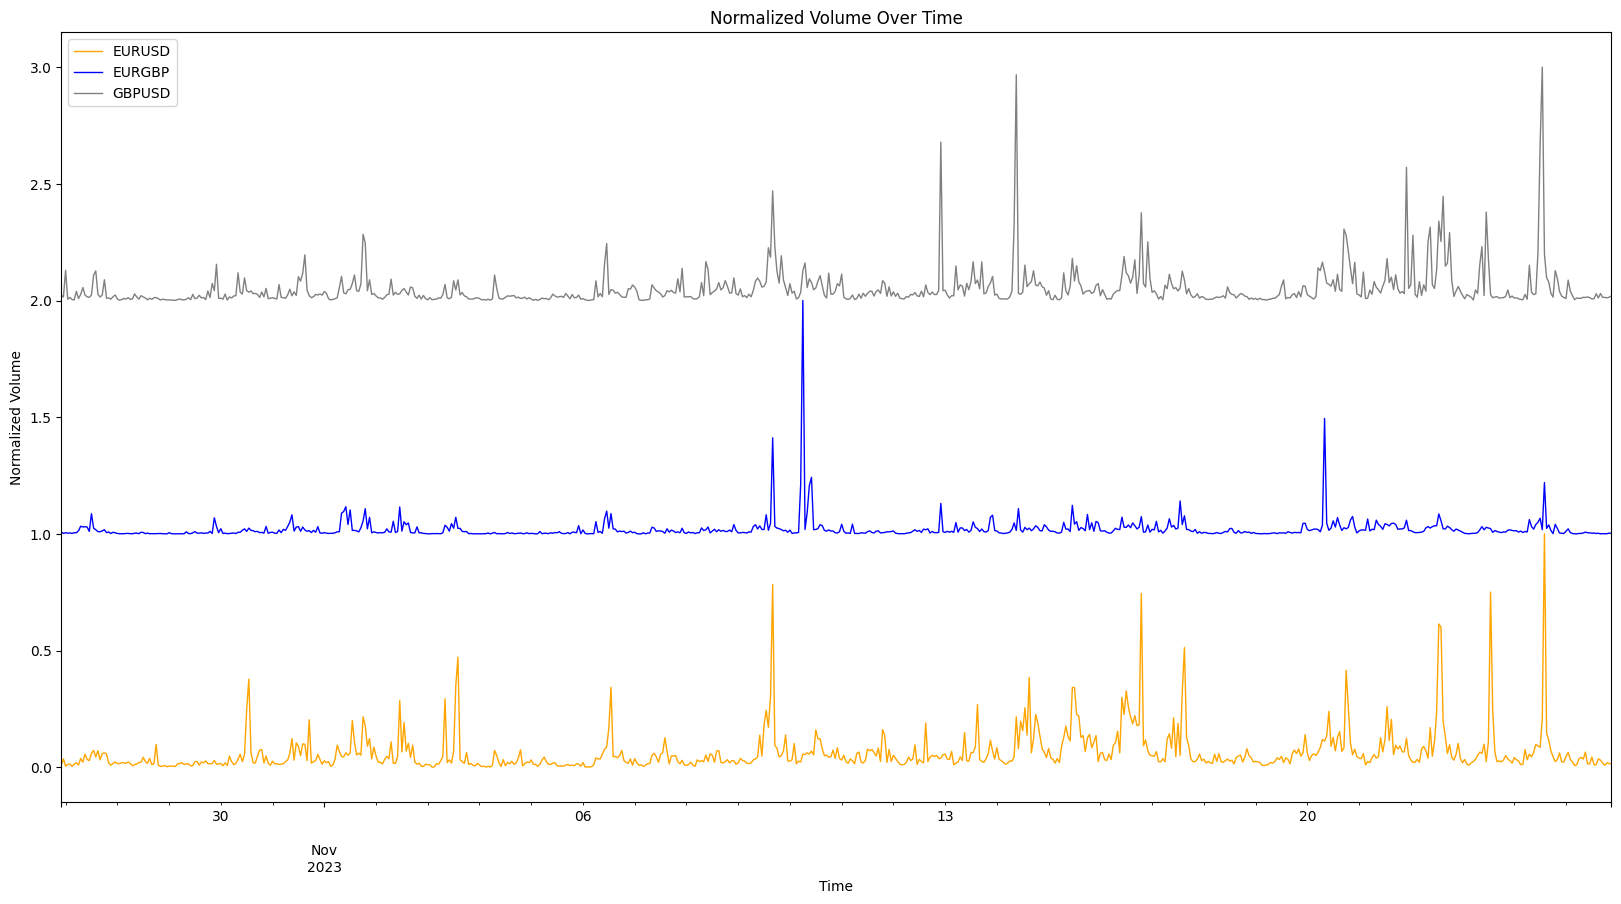

In [193]:
fig, ax = plt.subplots(figsize=(20, 10))

EURUSD_60['volume_normalized'] = (EURUSD_60['volume'] / EURUSD_60['volume'].max())
EURGBP_60['volume_normalized'] = (EURGBP_60['volume'] / EURGBP_60['volume'].max()) + 1
GBPUSD_60['volume_normalized'] = (GBPUSD_60['volume'] / GBPUSD_60['volume'].max()) + 2

EURUSD_60['volume_normalized'].plot(ax=ax, label='EURUSD', linewidth=1, color='orange')
EURGBP_60['volume_normalized'].plot(ax=ax, label='EURGBP', linewidth=1, color='blue')
GBPUSD_60['volume_normalized'].plot(ax=ax, label='GBPUSD', linewidth=1, color='gray')

ax.set_title('Normalized Volume Over Time')
ax.set_xlabel('Time')
ax.set_ylabel('Normalized Volume')
ax.legend()

plt.show()